In [2]:
##Had to install Tensorflow as it was not on the machine!
#pip install tensorflow


   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   - -------------------------------------- 13.6/390.2 MB 61.0 MB/s eta 0:00:07
   -- ------------------------------------- 27.0/390.2 MB 63.4 MB/s eta 0:00:06
   ---- ----------------------------------- 39.3/390.2 MB 61.0 MB/s eta 0:00:06
   ---- ----------------------------------- 47.2/390.2 MB 55.6 MB/s eta 0:00:07
   ----- ---------------------------------- 56.4/390.2 MB 52.8 MB/s eta 0:00:07
   ------- -------------------------------- 70.0/390.2 MB 55.1 MB/s eta 0:00:06
   -------- ------------------------------- 80.5/390.2 MB 55.2 MB/s eta 0:00:06
   --------- ------------------------------ 92.8/390.2 MB 54.9 MB/s eta 0:00:06
   ---------- ---------------------------- 104.3/390.2 MB 55.5 MB/s eta 0:00:06
   ----------- --------------------------- 117.7/390.2 MB 56.1 MB/s eta 0:00:05
   ------------- ------------------------- 133.2/390.2 MB 57.5 MB/s eta 0:00:05
   -------------- ------------------------ 144.4

In [131]:
#Setup and Improt Required Modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import datetime
import mplfinance as mpf

In [132]:
#Import Ask data
dataA = pd.read_csv('BRENTCMDUSD_5 Mins_Ask_2024.01.01_2024.01.31-2.csv')
#Import Bid Data
dataB = pd.read_csv('BRENTCMDUSD_5 Mins_Bid_2024.01.01_2024.01.31-2.csv')

In [133]:
#Merge Ask & Bid Datasets
Combo_Data = dataB.merge(dataA, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

#Display head of combined data set just to check
Combo_Data.head()

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2024.01.02 01:00:00,77.403,78.218,77.403,78.163,0.03690,77.453,78.268,77.453,78.213,0.04739
1,2024.01.02 01:05:00,78.148,78.443,78.138,78.348,0.02768,78.198,78.493,78.188,78.398,0.03212
2,2024.01.02 01:10:00,78.353,78.373,78.233,78.283,0.01774,78.403,78.423,78.283,78.333,0.01800
3,2024.01.02 01:15:00,78.278,78.348,78.068,78.078,0.01532,78.328,78.398,78.118,78.128,0.01597
4,2024.01.02 01:20:00,78.068,78.078,77.838,77.883,0.01511,78.118,78.128,77.888,77.933,0.01599


In [134]:
#Rename the Columns to something more sensible
Combo_Data.columns = ['Time (UTC)', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

Combo_Data.head()

,Time (UTC),Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2024.01.02 01:00:00,77.403,78.218,77.403,78.163,0.03690,77.453,78.268,77.453,78.213,0.04739
1,2024.01.02 01:05:00,78.148,78.443,78.138,78.348,0.02768,78.198,78.493,78.188,78.398,0.03212
2,2024.01.02 01:10:00,78.353,78.373,78.233,78.283,0.01774,78.403,78.423,78.283,78.333,0.01800
3,2024.01.02 01:15:00,78.278,78.348,78.068,78.078,0.01532,78.328,78.398,78.118,78.128,0.01597
4,2024.01.02 01:20:00,78.068,78.078,77.838,77.883,0.01511,78.118,78.128,77.888,77.933,0.01599


In [135]:
#Save the new combined data set to a new file
#The name of this file is contextual to the data - e.g. Silver Ask Bid
file_obj2 = open('BRENT_ASK_BID_Combo_Data.csv', 'w')
Combo_Data.to_csv('BRENT_ASK_BID_Combo_Data.csv', encoding='utf-8', index=False)
file_obj2.close()

In [136]:
#Clear Combo Data AND DataA/B
Combo_Data = []
DataA = []
DataB = []

In [137]:
#Import new combined data set
data = pd.read_csv('BRENT_ASK_BID_Combo_Data.csv', low_memory=False, sep=',')

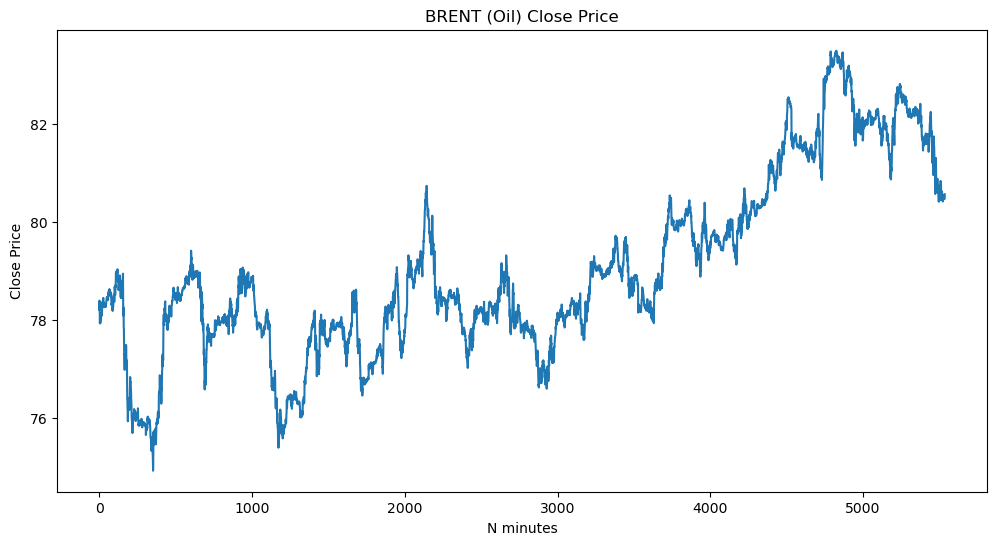

In [138]:
#Plot Ask Close Price Data
plt.figure(figsize=(12,6))
plt.plot(data['Close_Ask'])
plt.title('BRENT (Oil) Close Price')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

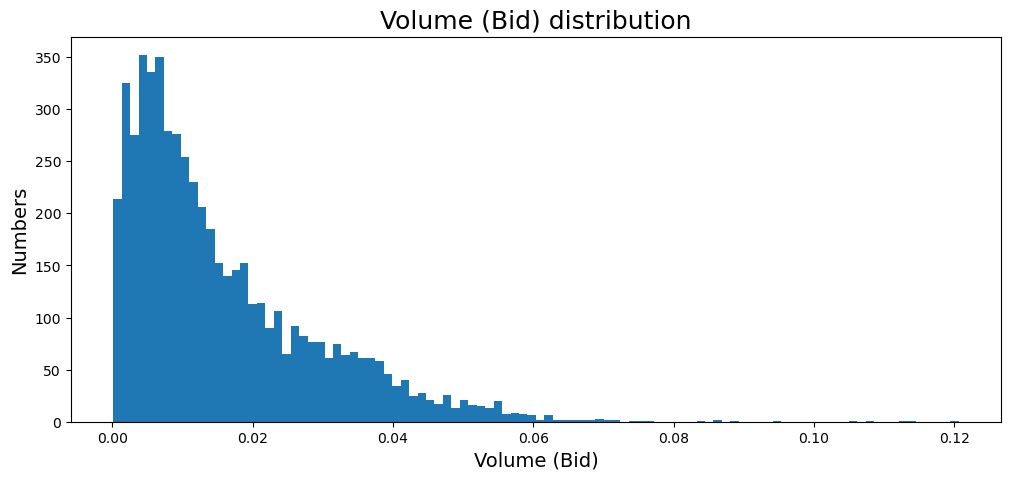

In [139]:
#Plot Bid Volume Data
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution', size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

In [140]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [141]:
#Calculate Deltas for Prices
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"] = data["Close_Ask"] - data["Close_Bid"]

In [194]:
data.head()

,Time (UTC),Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2024-01-02 01:00:00+00:00,77.403,78.218,77.403,78.163,0.03690,77.453,78.268,77.453,78.213,0.04739,0.01049,0.01049,0.05,0.05,0.05,0.05
1,2024-01-02 01:05:00+00:00,78.148,78.443,78.138,78.348,0.02768,78.198,78.493,78.188,78.398,0.03212,0.00444,0.00444,0.05,0.05,0.05,0.05
2,2024-01-02 01:10:00+00:00,78.353,78.373,78.233,78.283,0.01774,78.403,78.423,78.283,78.333,0.01800,0.00026,0.00026,0.05,0.05,0.05,0.05
3,2024-01-02 01:15:00+00:00,78.278,78.348,78.068,78.078,0.01532,78.328,78.398,78.118,78.128,0.01597,0.00065,0.00065,0.05,0.05,0.05,0.05
4,2024-01-02 01:20:00+00:00,78.068,78.078,77.838,77.883,0.01511,78.118,78.128,77.888,77.933,0.01599,0.00088,0.00088,0.05,0.05,0.05,0.05


In [195]:
data_chart = data

In [196]:
data_chart = data_chart.drop(['Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [197]:
data_chart.head()

,Time (UTC),Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2024-01-02 01:00:00+00:00,77.403,78.218,77.403,78.163,0.03690,0.04739,0.01049,0.01049,0.05,0.05,0.05,0.05
1,2024-01-02 01:05:00+00:00,78.148,78.443,78.138,78.348,0.02768,0.03212,0.00444,0.00444,0.05,0.05,0.05,0.05
2,2024-01-02 01:10:00+00:00,78.353,78.373,78.233,78.283,0.01774,0.01800,0.00026,0.00026,0.05,0.05,0.05,0.05
3,2024-01-02 01:15:00+00:00,78.278,78.348,78.068,78.078,0.01532,0.01597,0.00065,0.00065,0.05,0.05,0.05,0.05
4,2024-01-02 01:20:00+00:00,78.068,78.078,77.838,77.883,0.01511,0.01599,0.00088,0.00088,0.05,0.05,0.05,0.05


In [198]:
data_chart['Time (UTC)'] = pd.to_datetime(data['Time (UTC)'], utc=True)

In [199]:
data_chart = data_chart.set_index('Time (UTC)', inplace=False)

In [200]:
data_chart.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
Time (UTC),,,,,,,,,,,,
2024-01-02 01:00:00+00:00,77.403,78.218,77.403,78.163,0.03690,0.04739,0.01049,0.01049,0.05,0.05,0.05,0.05
2024-01-02 01:05:00+00:00,78.148,78.443,78.138,78.348,0.02768,0.03212,0.00444,0.00444,0.05,0.05,0.05,0.05
2024-01-02 01:10:00+00:00,78.353,78.373,78.233,78.283,0.01774,0.01800,0.00026,0.00026,0.05,0.05,0.05,0.05
2024-01-02 01:15:00+00:00,78.278,78.348,78.068,78.078,0.01532,0.01597,0.00065,0.00065,0.05,0.05,0.05,0.05
2024-01-02 01:20:00+00:00,78.068,78.078,77.838,77.883,0.01511,0.01599,0.00088,0.00088,0.05,0.05,0.05,0.05


In [202]:
#data_chart=data_chart.drop(['Time (UTC)'], axis=1)

In [204]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

In [205]:
data_chart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2024-01-02 01:00:00+00:00 to 2024-01-31 21:55:00+00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_Bid    5536 non-null   float64
 1   High_Bid    5536 non-null   float64
 2   Low_Bid     5536 non-null   float64
 3   Close_Bid   5536 non-null   float64
 4   Volume_Bid  5536 non-null   float64
dtypes: float64(5)
memory usage: 259.5 KB


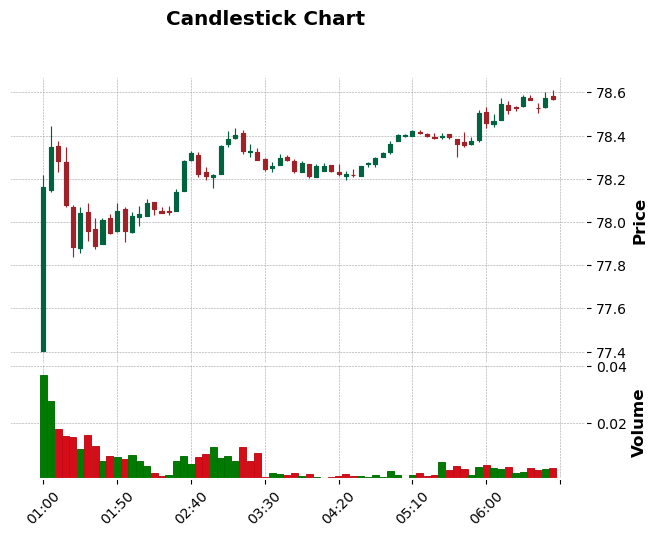

In [206]:
data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='Candlestick Chart', volume=True)

In [70]:
data = data.drop(['Time (UTC)'],axis=1)

In [71]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']

In [72]:
#Seperate X and y data sets
#X is everything except the Y_High_Bid and Y_Low_Ask columns
data_X = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)
#y is just the Y_High_Bid and Y_Low_Ask columns
data_y = data[['Y_High_Bid', 'Y_Low_Ask']]

In [73]:
data_X.shape

(5536, 16)

In [74]:
data_y.shape

(5536, 2)

In [75]:
data_y = data_y.shift(-1)

In [76]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
5531,80.452,80.460
5532,80.457,80.475
5533,80.477,80.508
5534,80.502,80.535
5535,NaN,NaN


In [77]:
data_y = data_y.dropna().reset_index(drop=True)

In [78]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
5530,80.467,80.510
5531,80.452,80.460
5532,80.457,80.475
5533,80.477,80.508
5534,80.502,80.535


In [79]:
data_X = data_X[:data_y.shape[0]]

In [80]:
print(data_X.shape, data_y.shape)

(5535, 16) (5535, 2)


In [82]:
#Split Data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.1, shuffle=False, stratify=None, random_state=101)

In [83]:
volume_scaler = MinMaxScaler()
price_scaler = MinMaxScaler()

In [84]:
volume_columns = [5, 10]  # Because 'Volume_Bid' and 'Volume_Ask' are at positions 5 and 10
# Convert back to DataFrame to apply transformations, then convert back to NumPy arrays
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Apply transformations on DataFrame columns
X_train_df.iloc[:, volume_columns] = volume_scaler.fit_transform(X_train_df.iloc[:, volume_columns])
X_test_df.iloc[:, volume_columns] = volume_scaler.transform(X_test_df.iloc[:, volume_columns])

# Convert back to NumPy arrays
X_train = X_train_df.values
X_test = X_test_df.values

In [85]:
price_columns = list(set(range(X_train.shape[1])) - set(volume_columns))
X_train[:, price_columns] = X_train[:, price_columns] / 100
X_test[:, price_columns] = X_test[:, price_columns] / 100

In [86]:
# Create inputs Numpy

X_train = np.array(X_train) 

with np.printoptions(precision=4):
    print("X_train:")
    print(X_train[:2,:])  
    print('\n')
    print(X_train[-2:,:]) 

print("numpy size: = ", X_train.shape)
print("type: ", X_train.dtype) 

X_train:
[[7.7403e-01 7.8218e-01 7.7403e-01 7.8163e-01 3.6900e-04 2.9552e-01
  7.8268e-01 7.7453e-01 7.8213e-01 4.7390e-04 8.8249e-02 1.0490e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.8148e-01 7.8443e-01 7.8138e-01 7.8348e-01 2.7680e-04 3.8220e-01
  7.8493e-01 7.8188e-01 7.8398e-01 3.2120e-04 6.8706e-02 4.4400e-05
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]]


[[8.1958e-01 8.2028e-01 8.1933e-01 8.2013e-01 2.0810e-04 8.2548e-01
  8.2078e-01 8.1983e-01 8.2063e-01 8.0060e-04 2.4575e-01 5.9250e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [8.2018e-01 8.2023e-01 8.1878e-01 8.1893e-01 1.5390e-04 8.3246e-01
  8.2073e-01 8.1928e-01 8.1943e-01 5.6360e-04 1.8670e-01 4.0970e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]]
numpy size: =  (4981, 16)
type:  float64


In [87]:
# Create inputs Numpy

X_test = np.array(X_test) 

with np.printoptions(precision=4):
    print("X_test:")
    print(X_test[:2,:])  
    print('\n')
    print(X_test[-2:,:]) 

print("numpy size: = ", X_test.shape)
print("type: ", X_test.dtype) 

X_test:
[[8.1888e-01 8.1913e-01 8.1823e-01 8.1843e-01 1.5050e-04 8.1734e-01
  8.1963e-01 8.1873e-01 8.1893e-01 6.0570e-04 2.0140e-01 4.5520e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [8.1848e-01 8.1933e-01 8.1823e-01 8.1853e-01 1.5910e-04 8.1268e-01
  8.1983e-01 8.1873e-01 8.1903e-01 6.9480e-04 2.2740e-01 5.3570e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]]


[[8.0402e-01 8.0457e-01 8.0402e-01 8.0452e-01 1.8900e-04 6.4712e-01
  8.0530e-01 8.0475e-01 8.0520e-01 2.9690e-04 8.9218e-02 1.0790e-04
  7.3000e-04 7.3000e-04 7.3000e-04 6.8000e-04]
 [8.0457e-01 8.0477e-01 8.0442e-01 8.0462e-01 1.0800e-04 6.5294e-01
  8.0550e-01 8.0508e-01 8.0530e-01 1.7220e-04 7.5102e-02 6.4200e-05
  6.8000e-04 7.3000e-04 6.6000e-04 6.8000e-04]]
numpy size: =  (554, 16)
type:  float64


In [88]:
# Create outputs Numpy

y_train = np.array(y_train) 

print("y_train:")
print(y_train[:3,:])  
print('\n')
print(y_train[-3:,:]) 

print("numpy size: = ", y_train.shape)
print("type: ", y_train.dtype) 

y_train:
[[78.443 78.188]
 [78.373 78.283]
 [78.348 78.118]]


[[82.028 81.983]
 [82.023 81.928]
 [81.913 81.873]]
numpy size: =  (4981, 2)
type:  float64


In [89]:
# Create outputs Numpy

y_test = np.array(y_test) 

print("y_test:")
print(y_test[:3,:])  
print('\n')
print(y_test[-3:,:]) 

print("numpy size: = ", y_test.shape)
print("type: ", y_test.dtype) 

y_test:
[[81.933 81.873]
 [81.873 81.788]
 [81.843 81.803]]


[[80.457 80.475]
 [80.477 80.508]
 [80.502 80.535]]
numpy size: =  (554, 2)
type:  float64


In [90]:
from tqdm import tqdm

In [91]:
n = data_X.shape[0]
t=data_X.shape[1]
N=50

L_train = X_train.shape[0] - N
L_test = X_test.shape[0] - N

print('Size of a X_train three-dimensional inputs tensor: ',L_train,N,t)
print('Size of a X_test three-dimensional inputs tensor: ',L_test,N,t)

Size of a X_train three-dimensional inputs tensor:  4931 50 16
Size of a X_test three-dimensional inputs tensor:  504 50 16


In [92]:
# create inputs zeros 3D tensors with 'float32'

X_train_3d = np.zeros((L_train, N, t))  # Shape (L_train, N, t)
X_test_3d = np.zeros((L_test, N, t))    # Shape (L_test, N, t)

In [93]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

y_train_2d = np.zeros((L_train, 2))    # For 'High_Bid' and 'Low_Ask'
y_test_2d = np.zeros((L_test, 2))

In [94]:
# Populate the 3D tensors and target arrays for training data
for k in tqdm(range(L_train)):
    X_train_3d[k] = X_train[k:k+N]
    y_train_2d[k] = y_train[k+N-1]  # Target is at the end of the sequence

100%|██████████| 4931/4931 [00:00<00:00, 182757.46it/s]


In [95]:
# Populate the 3D tensors and target arrays for testing data
for k in tqdm(range(L_test)):
    X_test_3d[k] = X_test[k:k+N]
    y_test_2d[k] = y_test[k+N-1]

100%|██████████| 504/504 [00:00<00:00, 311009.15it/s]


In [96]:
# Display the shapes and sample data for verification
print("X_train_3d shape:", X_train_3d.shape)
print("y_train_2d shape:", y_train_2d.shape)
print("X_test_3d shape:", X_test_3d.shape)
print("y_test_2d shape:", y_test_2d.shape)

X_train_3d shape: (4931, 50, 16)
y_train_2d shape: (4931, 2)
X_test_3d shape: (504, 50, 16)
y_test_2d shape: (504, 2)


In [97]:
# Print sample data for inspection
with np.printoptions(precision=4):
    print("\nSample X_train_3d (first sequence):\n", X_train_3d[0])
    print("\nSample y_train_2d (first 5 targets):\n", y_train_2d[:5])
    print("\nSample X_test_3d (first sequence):\n", X_test_3d[0])
    print("\nSample y_test_2d (first 5 targets):\n", y_test_2d[:5])


Sample X_train_3d (first sequence):
 [[7.7403e-01 7.8218e-01 7.7403e-01 7.8163e-01 3.6900e-04 2.9552e-01
  7.8268e-01 7.7453e-01 7.8213e-01 4.7390e-04 8.8249e-02 1.0490e-04
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.8148e-01 7.8443e-01 7.8138e-01 7.8348e-01 2.7680e-04 3.8220e-01
  7.8493e-01 7.8188e-01 7.8398e-01 3.2120e-04 6.8706e-02 4.4400e-05
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.8353e-01 7.8373e-01 7.8233e-01 7.8283e-01 1.7740e-04 4.0605e-01
  7.8423e-01 7.8283e-01 7.8333e-01 1.8000e-04 5.5204e-02 2.6000e-06
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.8278e-01 7.8348e-01 7.8068e-01 7.8078e-01 1.5320e-04 3.9732e-01
  7.8398e-01 7.8118e-01 7.8128e-01 1.5970e-04 5.6464e-02 6.5000e-06
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.8068e-01 7.8078e-01 7.7838e-01 7.7883e-01 1.5110e-04 3.7289e-01
  7.8128e-01 7.7888e-01 7.7933e-01 1.5990e-04 5.7207e-02 8.8000e-06
  5.0000e-04 5.0000e-04 5.0000e-04 5.0000e-04]
 [7.7878e-01 7.8068e-01 7.7858e-01 7.8043e-01 1

In [98]:
print("X_train_3d shape:", X_train_3d.shape)

X_train_3d shape: (4931, 50, 16)


In [99]:
model = keras.Sequential([

    keras.layers.LSTM(64, activation='relu', input_shape=(50, 16)),

    keras.layers.Dense(2)

])

print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,866 (81.51 KB)

 Trainable params: 20,866 (81.51 KB)

 Non-trainable params: 0 (0.00 B)

None


In [100]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [101]:
print("X_train shape:", X_train.shape)  # Expected: (samples, 16)
print("y_train shape:", y_train.shape)  # Expected: (samples, 2)

X_train shape: (4981, 16)
y_train shape: (4981, 2)


In [104]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_LSTM_GOLD.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(X_train_3d, y_train_2d, epochs=10, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], batch_size=50)

Epoch 1/10
75/79 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4405 - mae: 0.5098
Epoch 1: val_loss improved from inf to 2.41092, saving model to best_model_LSTM_GOLD.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4380 - mae: 0.5085 - val_loss: 2.4109 - val_mae: 1.1037
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2879 - mae: 0.4116
Epoch 2: val_loss improved from 2.41092 to 1.91596, saving model to best_model_LSTM_GOLD.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2876 - mae: 0.4114 - val_loss: 1.9160 - val_mae: 0.9734
Epoch 3/10
76/79 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2706 - mae: 0.3979
Epoch 3: val_loss improved from 1.91596 to 1.54855, saving model to best_model_LSTM_GOLD.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2710 - mae: 0.3983 - val_loss: 1.5486 - val_mae: 0.8930
Epoch 4/10
78/79 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2477 - mae: 0.3821
Epoch 4: val_loss did not improve from 1.54855
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/ste

In [105]:
mse, mae = model.evaluate(X_test_3d, y_test_2d, verbose = 1)

print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7690 - mae: 0.7585
Mean absolute error: 0.76219
Mean squared error: 0.79358


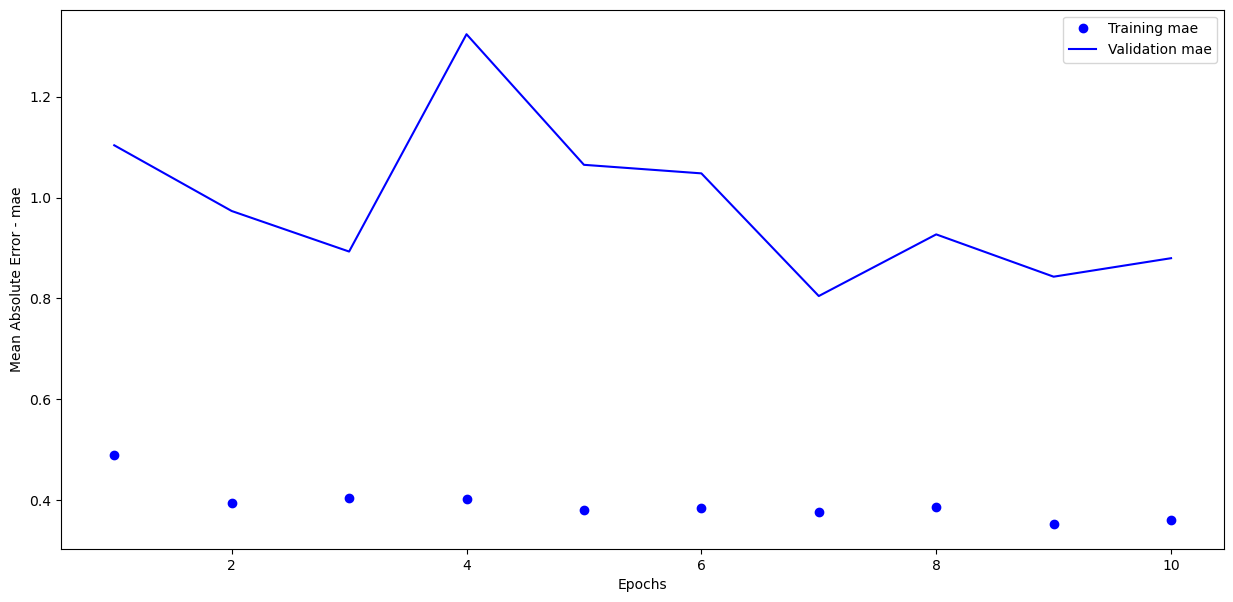

In [106]:
history_dict = history.history

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

In [107]:
# Generate predictions on the test set
y_pred_scaled = model.predict(X_test_3d)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [117]:
# Convert predictions back to the original scale
y_pred = y_pred_scaled * 100

In [118]:
# Extract predictions for High Bid and Low Ask
high_bid_predictions = y_pred[:, 0]  # First column for High Bid
low_ask_predictions = y_pred[:, 1]   # Second column for Low Ask

In [119]:
# Extract last PREDICTED for High Bid
last_high_bid_prediction = y_pred[-1, 0]  # Last row, first column

# Extract last PREDICTED for Low Ask
last_low_ask_prediction = y_pred[-1, 1]   # Last row, second column

In [120]:
# Extract last ACTUAL for High Bid
last_high_bid_actual = y_test[-1, 0]  # Last row, first column

# Extract last ACTUAL for Low Ask
last_low_ask_actual = y_test[-1, 1]   # Last row, second column

In [121]:
# Display the predictions
print("High Bid Predictions:", high_bid_predictions)
print("Low Ask Predictions:", low_ask_predictions)

# Optionally, compare with actual values from y_test (multiplied by 10 for the original scale)
print("Actual High Bid:", y_test[:, 0] * 10)
print("Actual Low Ask:", y_test[:, 1] * 10)

High Bid Predictions: [8160.417  8160.1685 8160.742  8159.2666 8153.6064 8152.429  8152.945
 8154.16   8158.2    8161.305  8165.397  8172.3496 8178.885  8182.888
 8184.789  8186.152  8187.721  8194.149  8204.654  8216.282  8226.494
 8235.186  8240.686  8245.545  8249.267  8253.066  8256.922  8259.195
 8261.21   8262.74   8265.438  8267.751  8268.038  8269.571  8270.452
 8270.813  8272.283  8274.598  8274.488  8274.727  8274.296  8273.702
 8272.53   8271.149  8270.473  8266.521  8262.21   8260.468  8258.773
 8257.454  8256.745  8256.339  8256.667  8256.857  8254.848  8254.961
 8256.707  8258.029  8259.89   8261.075  8261.945  8263.019  8263.316
 8261.016  8258.998  8256.554  8254.37   8252.335  8252.752  8254.919
 8259.05   8263.906  8268.72   8271.692  8275.327  8278.559  8281.468
 8284.286  8286.403  8288.824  8291.326  8292.58   8294.759  8296.259
 8296.382  8296.287  8299.278  8301.609  8301.614  8302.054  8301.268
 8303.482  8306.997  8306.8545 8305.099  8301.024  8297.236  8293.91

In [122]:
#Printing Last Row Predictions and Actuals Rounded to 3 Decmial Places
print("Predicted High Bid:",round(last_high_bid_prediction,3))
print("Actual High Bid:",round(last_high_bid_actual,3))
print("Predicted Low Ask:",round(last_low_ask_prediction,3))
print("Actual High Bid:",round(last_high_bid_actual,3))

Predicted High Bid: 7993.886
Actual High Bid: 80.502
Predicted Low Ask: 7997.138
Actual High Bid: 80.502


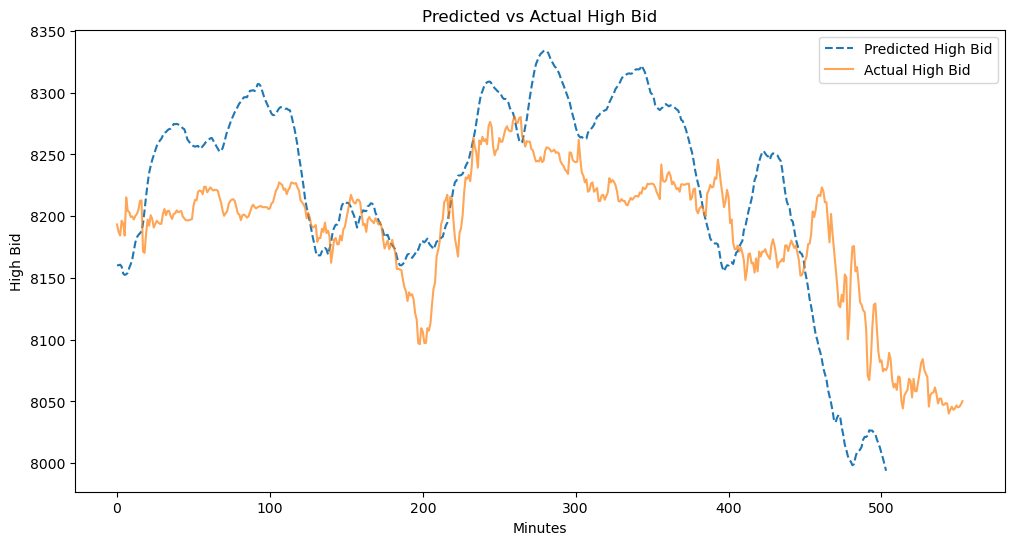

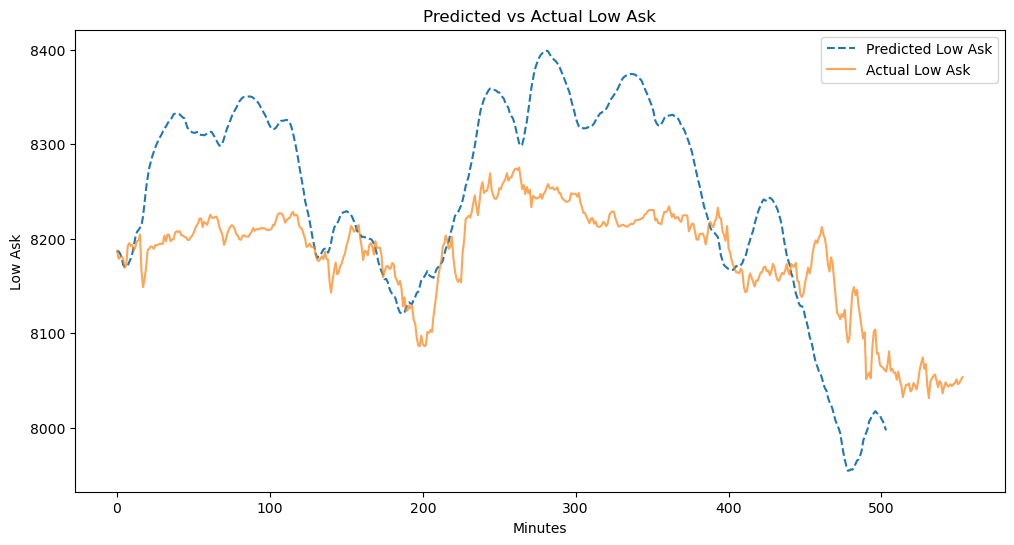

In [125]:
# Plot High Bid predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(high_bid_predictions, label="Predicted High Bid", linestyle='--')
plt.plot(y_test[:, 0] * 100, label="Actual High Bid", alpha=0.7)
plt.title("Predicted vs Actual High Bid")
plt.xlabel("Minutes")
plt.ylabel("High Bid")
plt.legend()
plt.show()

# Plot Low Ask predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(low_ask_predictions, label="Predicted Low Ask", linestyle='--')
plt.plot(y_test[:, 1] * 100, label="Actual Low Ask", alpha=0.7)
plt.title("Predicted vs Actual Low Ask")
plt.xlabel("Minutes")
plt.ylabel("Low Ask")
plt.legend()
plt.show()

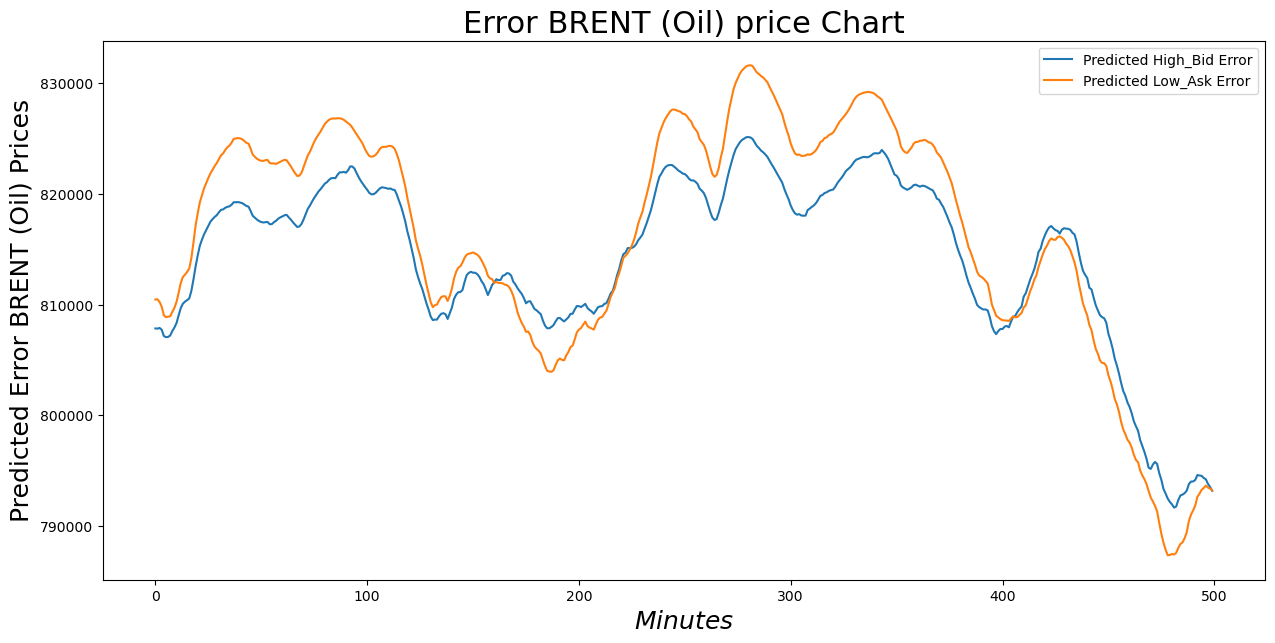

In [126]:
N1=0  # The first minute for the chart  
LL = 500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (y_pred[N1:N2,0] - y_test[N1:N2,0]) *100
b = (y_pred[N1:N2,1] - y_test[N1:N2,1]) *100

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100

line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error BRENT (Oil) price Chart', size=22)
plt.ylabel('Predicted Error BRENT (Oil) Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()